# Interactive visualizing Word2Vec using t-SNE

In [2]:
%matplotlib --list

Available matplotlib backends: ['tk', 'gtk', 'gtk3', 'gtk4', 'wx', 'qt4', 'qt5', 'qt6', 'qt', 'osx', 'nbagg', 'notebook', 'agg', 'svg', 'pdf', 'ps', 'inline', 'ipympl', 'widget']


In [3]:
from datetime import datetime
import seaborn as sns
import gensim
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.widgets import Button
from matplotlib.text import Annotation
%matplotlib widget

In [4]:
!jupyter nbextension install --user --py widgetsnbextension

Installing /home/jfrez/.local/lib/python3.8/site-packages/widgetsnbextension/static -> jupyter-js-widgets
Up to date: /home/jfrez/.local/share/jupyter/nbextensions/jupyter-js-widgets/extension.js.map
Up to date: /home/jfrez/.local/share/jupyter/nbextensions/jupyter-js-widgets/extension.js
- Validating: OK

    To initialize this nbextension in the browser every time the notebook (or other app) loads:
    
          jupyter nbextension enable widgetsnbextension --user --py
    


In [5]:
!jupyter nbextension enable widgetsnbextension --user --py

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [6]:
model = gensim.models.word2vec.Word2Vec.load('/home/jfrez/AI2/TextGAN-PyTorch/corpusgood_sinrepeticiones.w2v')
# model_hr = gensim.models.word2vec.Word2Vec.load('/home/jfrez/AI2/TextGAN-PyTorch/huracanes_sinrepeticiones.w2v')

## Option 1

In [ ]:
words_model = []
embeddings_model = []

for word in list(model.wv.index_to_key):
    embeddings_model.append(model.wv[word])
    words_model.append(word)

In [ ]:
tsne_model_2d = TSNE(perplexity=50, n_components=2, init='pca', n_iter=250, random_state=32)
embeddings_model_2d = tsne_model_2d.fit_transform(embeddings_model)

In [ ]:
def tsne_plot_2d(label, embeddings, words=[], a=1):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, 1))
    x = embeddings[:,0]
    y = embeddings[:,1]
    plt.scatter(x, y, c=colors, alpha=a, label=label)
    for i, word in enumerate(words):
        plt.annotate(word, alpha=0.3, xy=(x[i], y[i]), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom', size=10)
    plt.legend(loc=4)
    plt.grid(True)
    plt.savefig("tsne-images/{}.png".format(datetime.now().strftime("%Y%m%d_%H%M")), format='png', dpi=150, bbox_inches='tight')
    plt.show()

In [ ]:
tsne_plot_2d('W2V t-SNE', embeddings_model_2d, words_model, 0.1)
# tsne_plot_2d('W2V Plot', embeddings_model_2d, 0.1)

## Option 2

### Function version

In [ ]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.index_to_key:
        tokens.append(model.wv[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=50, n_components=2, init='pca', n_iter=3000, random_state=32)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i], xy=(x[i], y[i]), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom')
    plt.savefig("tsne-images/{}.png".format(datetime.now().strftime("%Y%m%d_%H%M")), format='png', dpi=150, bbox_inches='tight')
    plt.show()

In [ ]:
tsne_plot(model)

### Separate version

In [ ]:
labels = []
tokens = []

for word in model.wv.index_to_key:
    tokens.append(model.wv[word])
    labels.append(word)

In [ ]:
tsne_model = TSNE(perplexity=50, n_components=2, init='pca', n_iter=3000, random_state=32)
new_values = tsne_model.fit_transform(tokens)

In [ ]:
x = []
y = []
for value in new_values:
    x.append(value[0])
    y.append(value[1])

In [ ]:
plt.figure(figsize=(8, 8)) 
for i in range(len(x)):
    plt.scatter(x[i],y[i])
    plt.annotate(labels[i], xy=(x[i], y[i]), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom', fontsize=1)
plt.savefig("tsne-images/{}.pdf".format(datetime.now().strftime("%Y%m%d_%H%M")), format='pdf', dpi=150, bbox_inches='tight')
# plt.savefig("tsne-images/{}.png".format(datetime.now().strftime("%Y%m%d_%H%M")), format='png', dpi=150, bbox_inches='tight')
plt.show()

## Option 3 (Using Seaborn)

In [7]:
labels = []
tokens = []

for word in model.wv.index_to_key:
    tokens.append(model.wv[word])
    labels.append(word)

In [ ]:
#Dataset huracanes
labels_hr = []
tokens_hr = []

for word in model_hr.wv.index_to_key:
    tokens_hr.append(model_hr.wv[word])
    labels_hr.append(word)

In [8]:
tsne_model = TSNE(perplexity=50, n_components=2, init='pca', n_iter=2500, random_state=32)
new_values = tsne_model.fit_transform(tokens)

/home/jfrez/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/jfrez/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


In [ ]:
new_values_hr = tsne_model.fit_transform(tokens_hr)

In [9]:
# set the default style
sns.set()

# define two colors, just to enrich the example
labels_color_map = {}
for index, value in enumerate(sns.color_palette().as_hex()):
    labels_color_map[index] = value

In [10]:
instances_colors = []
axis_values_x = []
axis_values_y = []
for index, value in enumerate(new_values):
    # print instance, index, labels[index]
    color = labels_color_map[index % 10]
    instances_colors.append(color)
    axis_values_x.append(value[0])
    axis_values_y.append(value[1])

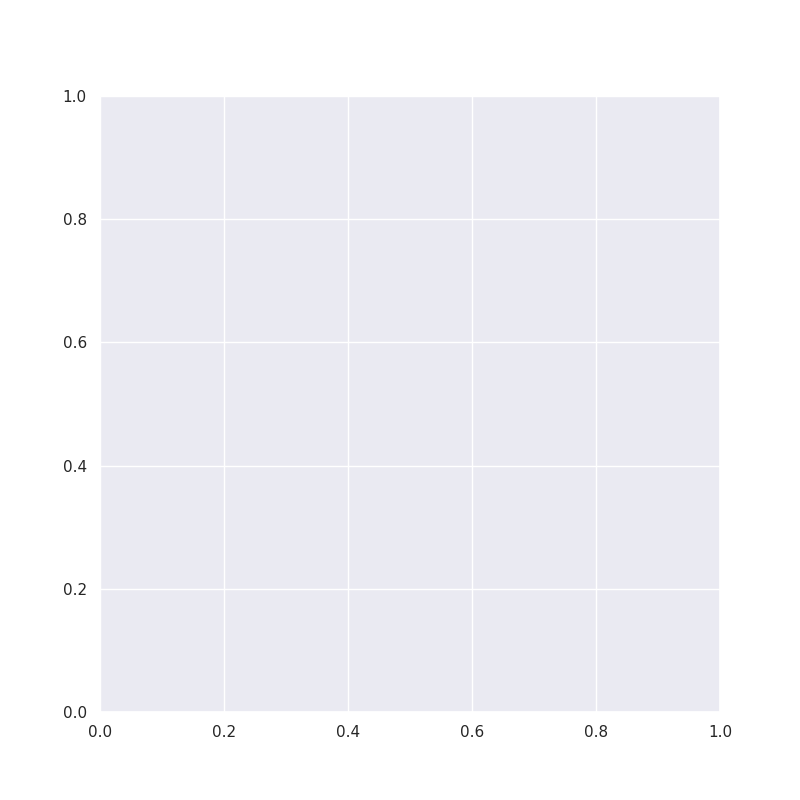

In [11]:
fig = plt.figure(figsize=(8, 8))
ax = plt.subplot()

In [12]:
# extract the scatterplot drawing in a separate function so we ca re-use the code
def draw_scatterplot():
    ax.scatter(
        axis_values_x,
        axis_values_y,
        c=instances_colors,
        picker=True
    )

In [13]:
# draw the initial scatterplot
draw_scatterplot()

In [14]:
# create and add an annotation object (a text label)
def annotate(axis, text, x, y):
    text_annotation = Annotation(text, xy=(x, y), xycoords='data')
    axis.add_artist(text_annotation)

In [15]:
# define the behaviour -> what happens when you pick a dot on the scatterplot by clicking close to it
def onpick(event):
    # step 1: take the index of the dot which was picked
    ind = event.ind

    # step 2: save the actual coordinates of the click, so we can position the text label properly
    label_pos_x = event.mouseevent.xdata
    label_pos_y = event.mouseevent.ydata

    # just in case two dots are very close, this offset will help the labels not appear one on top of each other
    offset = 0

    # if the dots are to close one to another, a list of dots clicked is returned by the matplotlib library
    for i in ind:
        # step 3: take the label for the corresponding instance of the data
        label = labels[i]

        # step 4: log it for debugging purposes
        print("index", i, label)

        # step 5: create and add the text annotation to the scatterplot
        annotate(
            ax,
            label,
            label_pos_x + offset,
            label_pos_y + offset
        )

        # step 6: force re-draw
        ax.figure.canvas.draw_idle()

        # alter the offset just in case there are more than one dots affected by the click
        offset += 0.01

In [16]:
# connect the click handler function to the scatterplot
fig.canvas.mpl_connect('pick_event', onpick)

12

In [17]:
# create the "clear all" button, and place it somewhere on the screen
ax_clear_all = plt.axes([0.0, 0.0, 0.1, 0.05])
button_clear_all = Button(ax_clear_all, 'Clear all')

In [18]:
# define the "clear all" behaviour
def onclick(event):
    # step 1: we clear all artist object of the scatter plot
    ax.cla()

    # step 2: we re-populate the scatterplot only with the dots not the labels
    draw_scatterplot()

    # step 3: we force re-draw
    ax.figure.canvas.draw_idle()


# link the event handler function to the click event on the button
button_clear_all.on_clicked(onclick)

# initial drawing of the scatterplot
# plt.plot()
# print("scatterplot done")

0

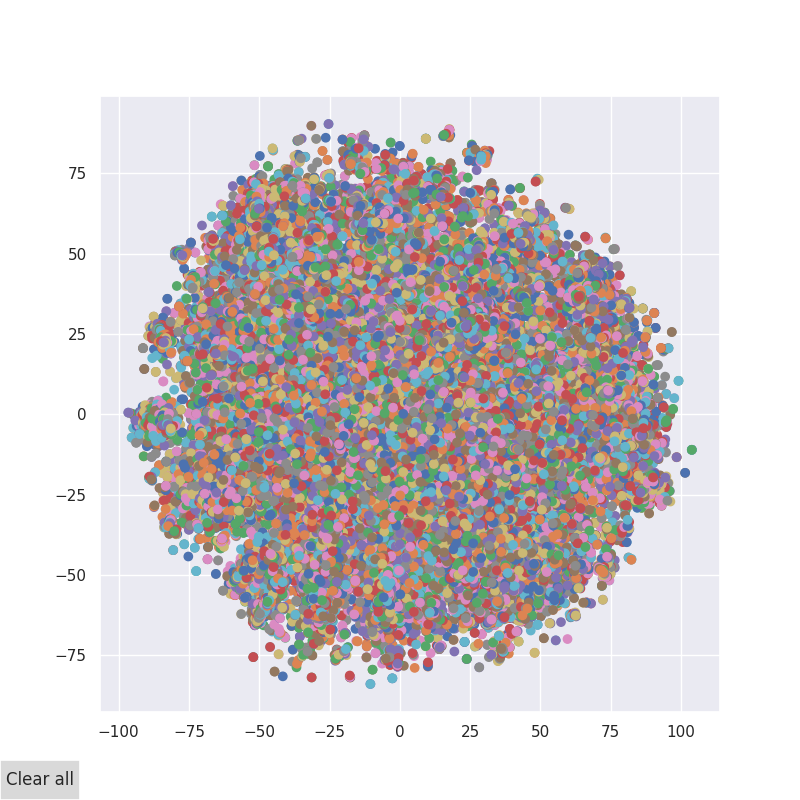

In [19]:
# present the scatterplot
# plt.savefig("tsne-images/{}.png".format(datetime.now().strftime("%Y%m%d_%H%M")), format='png', dpi=150, bbox_inches='tight')
plt.show()

## Option 4 (Visualizing similar words)

In [20]:
keys = ['pandemia', 'covid19', 'china', 'quarantine', 'mask', 'pneumonia', 'vaccine']

embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in model.wv.most_similar(word, topn=30):
        words.append(similar_word)
        embeddings.append(model.wv[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

In [21]:
embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
tsne_model_en_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

/home/jfrez/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/jfrez/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


In [22]:
def tsne_plot_similar_words(title, labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, c=color, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.8, xy=(x[i], y[i]), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=0)
    plt.title(title)
    plt.grid(True)
    if filename:
        plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')
    plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

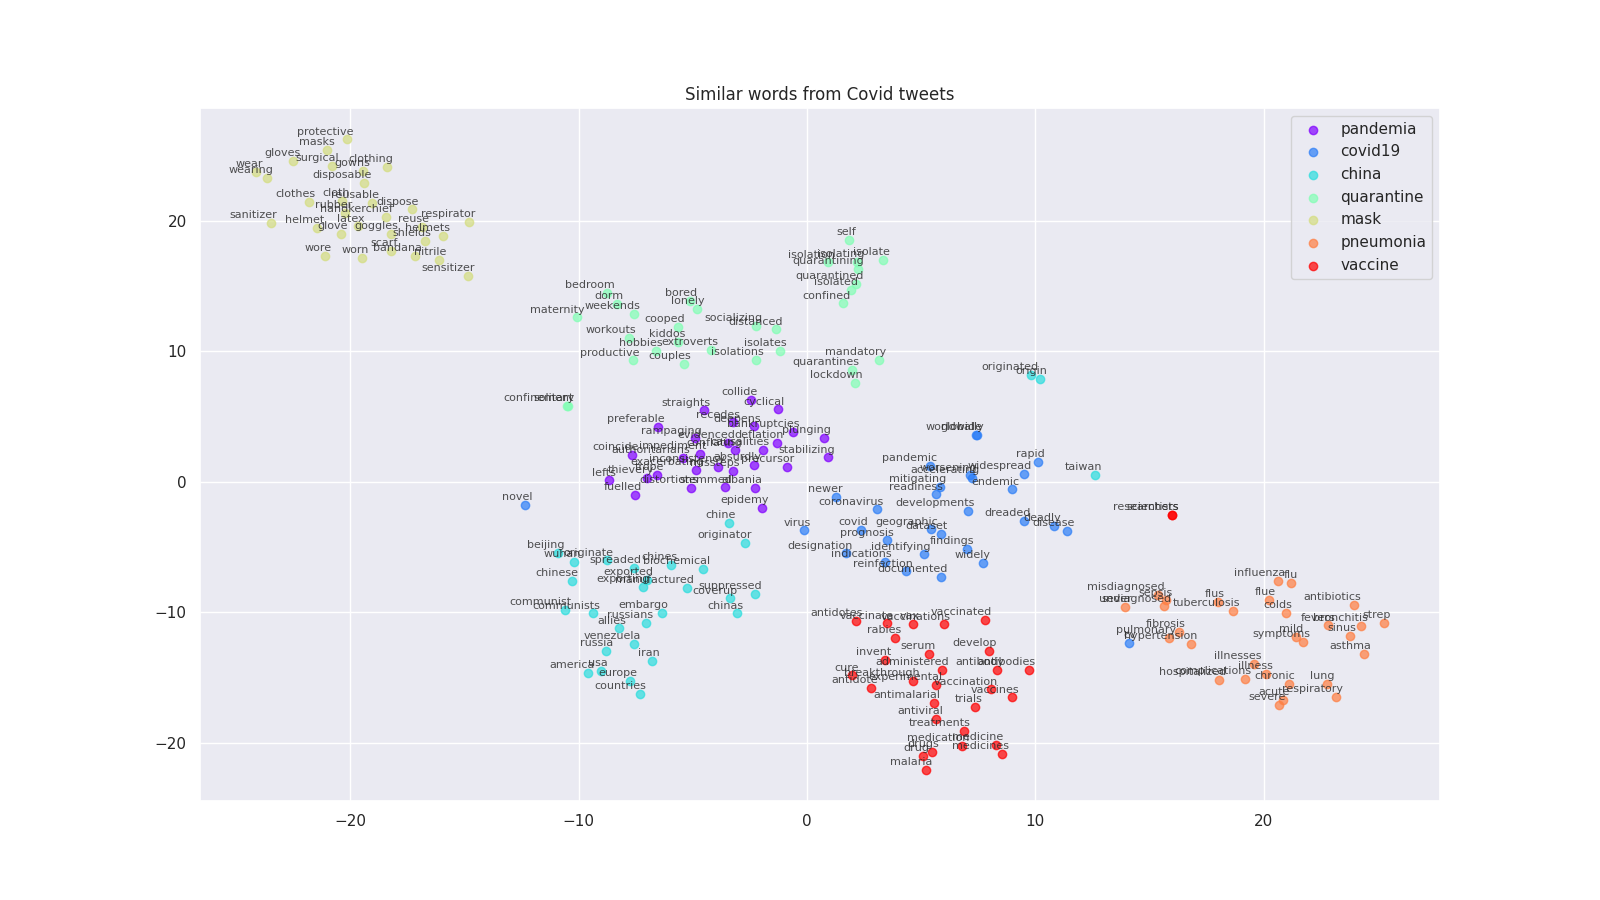

In [23]:
tsne_plot_similar_words('Similar words from Covid tweets', keys, embeddings_en_2d, word_clusters, 0.7, 'tsne-images/{}.png'.format(datetime.now().strftime("%Y%m%d_%H%M")))